# BÁO CÁO DỮ LIỆU VỀ TÌNH HÌNH DỊCH BỆNH

### Mục tiêu

#### - Đánh giá và so sánh số ca nhiễm, số ca tử vong, số ca hồi phục ở các quốc gia và vùng lãnh thổ khác nhau.
#### - Theo dõi sự biến động của các chỉ số theo thời gian để đánh giá tình hình dịch bệnh.
#### - Khám phá sự phân bố địa lý của các trường hợp nhiễm, tử vong, và hồi phục.
#### - So sánh dữ liệu giữa các quốc gia và vùng lãnh thổ để hiểu sự chênh lệch địa lý.



In [1]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ DataFrame
df = pd.read_csv('data.csv')

# Hiển thị 5 dòng đầu tiên của dữ liệu
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


## Tổng Quan về Dữ Liệu

In [3]:
print("Số lượng dòng và cột: ", df.shape)
print("Tổng số lượng dữ liệu bị thiếu: ", df.isnull().sum().sum())
print("Thông tin về kiểu dữ liệu của từng cột:\n", df.dtypes)

Số lượng dòng và cột:  (4011, 14)
Tổng số lượng dữ liệu bị thiếu:  1980
Thông tin về kiểu dữ liệu của từng cột:
 FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                   int64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object


## Thống Kê Tổng Quan

In [4]:
# Thống kê tổng quan
summary_stats = df.describe()

# Hiển thị
summary_stats

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3922.000000,3922.000000,4.011000e+03,4011.000000,4.011000e+03,4.011000e+03,3922.000000,3963.000000
mean,32386.688208,35.768908,-71.113714,2.102613e+04,476.518823,1.180731e+04,9.259591e+03,5738.940929,2.228699
std,18017.294540,13.391261,55.220345,1.055172e+05,2833.090464,8.193885e+04,5.719777e+04,3227.374130,17.174874
min,66.000000,-71.949900,-175.198200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19049.000000,33.202974,-96.580090,7.010000e+02,9.000000,0.000000e+00,5.780000e+02,3536.967442,0.969239
50%,30067.000000,37.910342,-86.708116,1.968000e+03,31.000000,0.000000e+00,1.657000e+03,5840.344304,1.551567
75%,47039.000000,42.181730,-77.358102,7.693500e+03,112.000000,0.000000e+00,4.915500e+03,7752.568815,2.341350
max,99999.000000,71.706900,178.065000,2.636045e+06,81593.000000,2.114760e+06,2.400750e+06,27388.219766,1026.206897


## Tiền xử lý dữ liệu

### 1. Loại Bỏ Cột Không Cần Thiết

In [5]:
df = df.drop('FIPS', axis=1)
df = df.drop('Admin2', axis=1)
df = df.drop('Province_State', axis=1)
df = df.drop('Combined_Key', axis=1)

### 2. Xử Lý Dữ Liệu Thiếu

In [6]:
df["Lat"] = df["Lat"].fillna(df["Lat"].mean())
df["Long_"] = df["Long_"].fillna(df["Long_"].mean())
df["Incident_Rate"] = df["Incident_Rate"].fillna(df["Incident_Rate"].mean())
df["Case_Fatality_Ratio"] = df["Case_Fatality_Ratio"].fillna(df["Case_Fatality_Ratio"].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       4011 non-null   object 
 1   Last_Update          4011 non-null   object 
 2   Lat                  4011 non-null   float64
 3   Long_                4011 non-null   float64
 4   Confirmed            4011 non-null   int64  
 5   Deaths               4011 non-null   int64  
 6   Recovered            4011 non-null   int64  
 7   Active               4011 non-null   int64  
 8   Incident_Rate        4011 non-null   float64
 9   Case_Fatality_Ratio  4011 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 313.5+ KB


In [8]:
# Ghi DataFrame vào một tệp CSV mới
df.to_csv('new_data.csv', index=False)

## Các biểu đồ phân tích

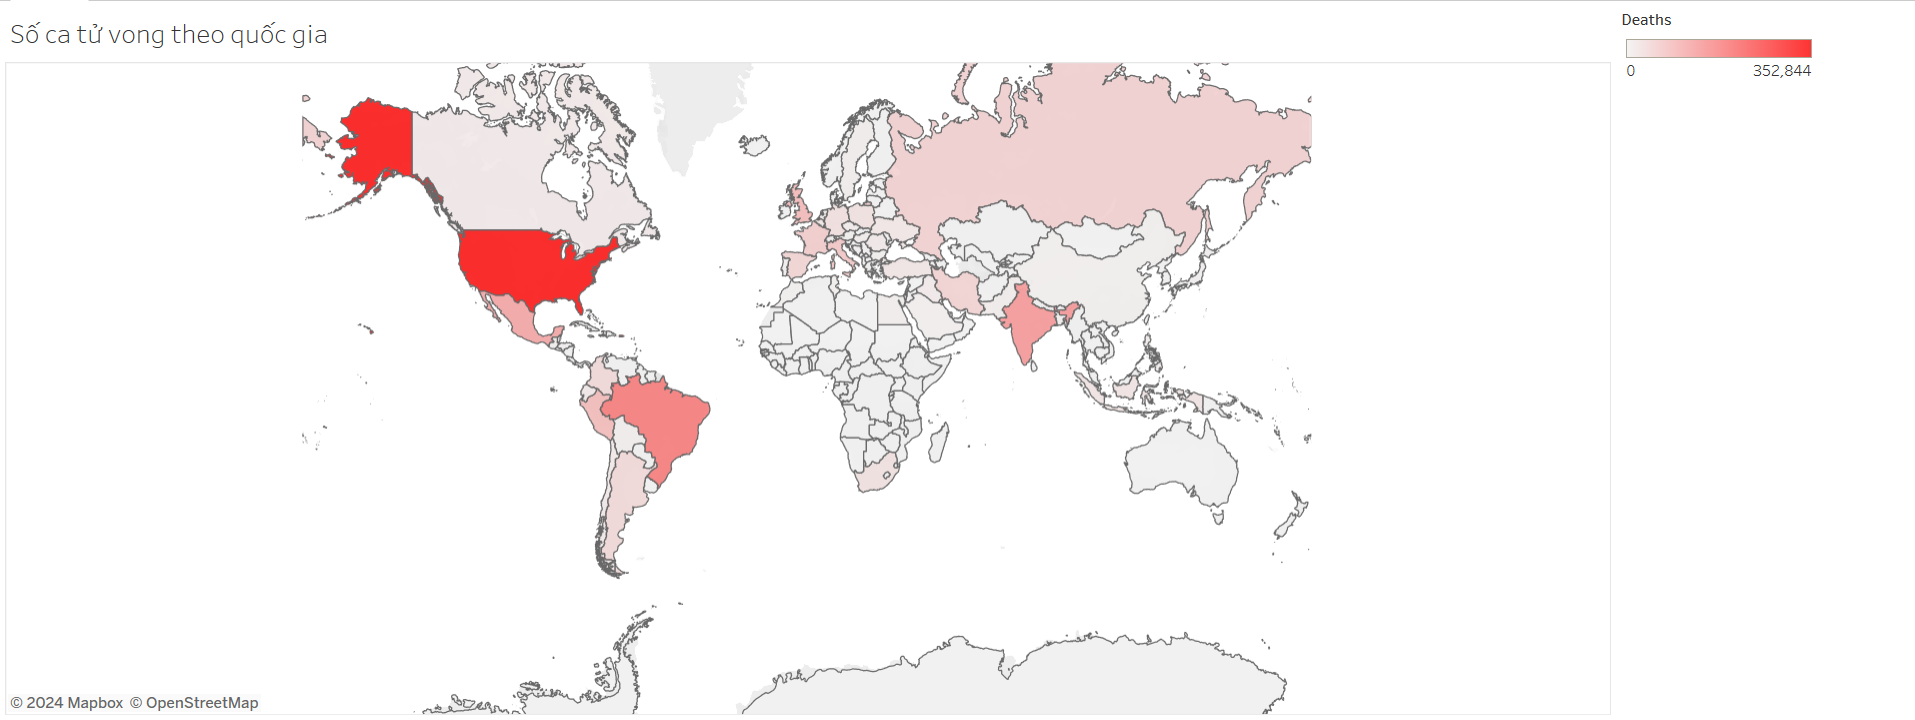

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

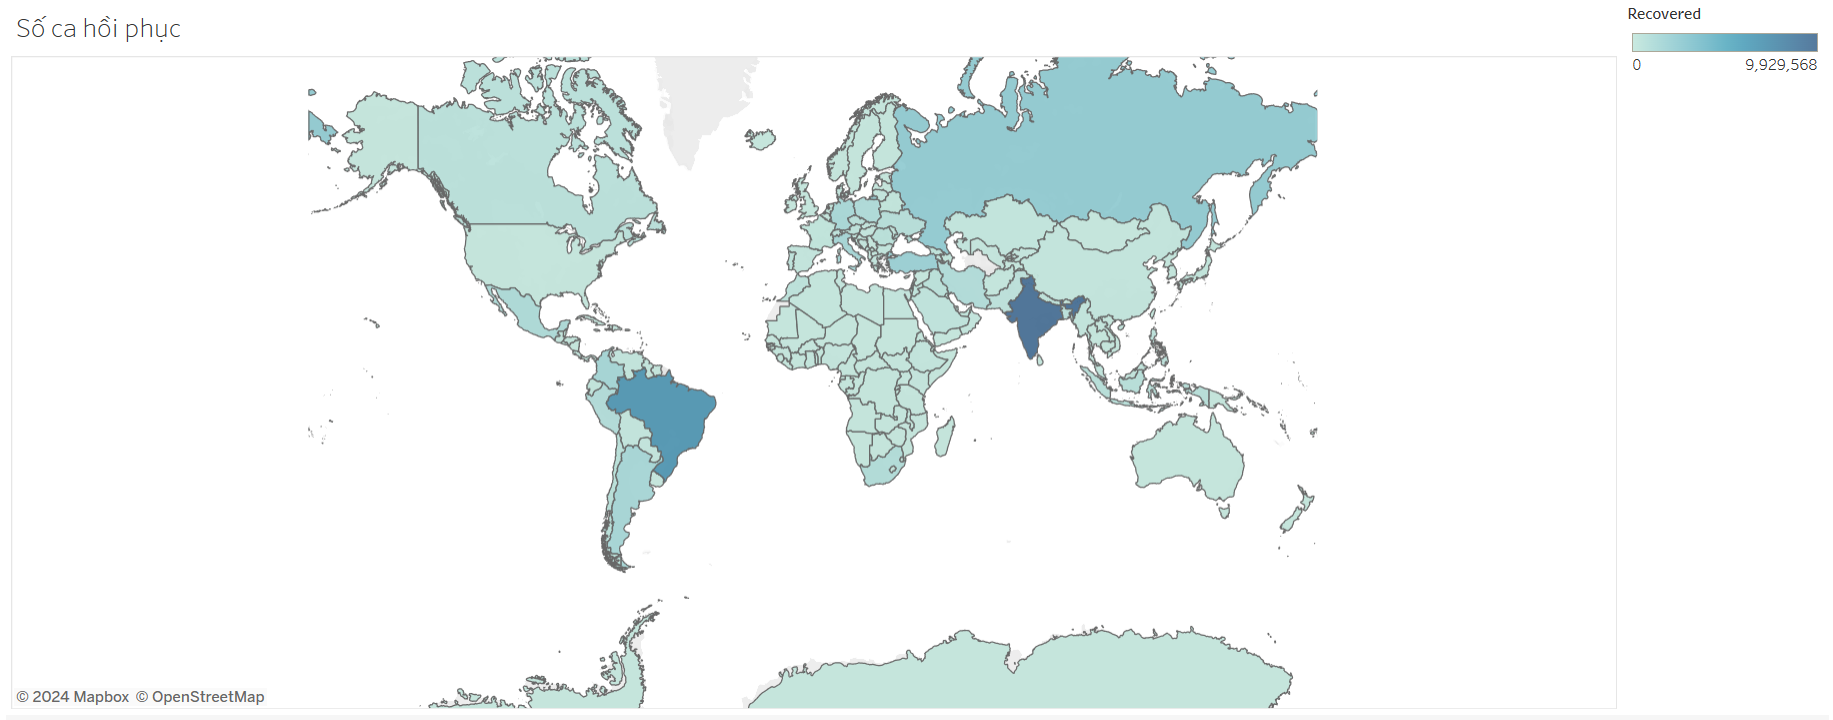

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet2?:language=en-US&:display_count=n&:origin=viz_share_link

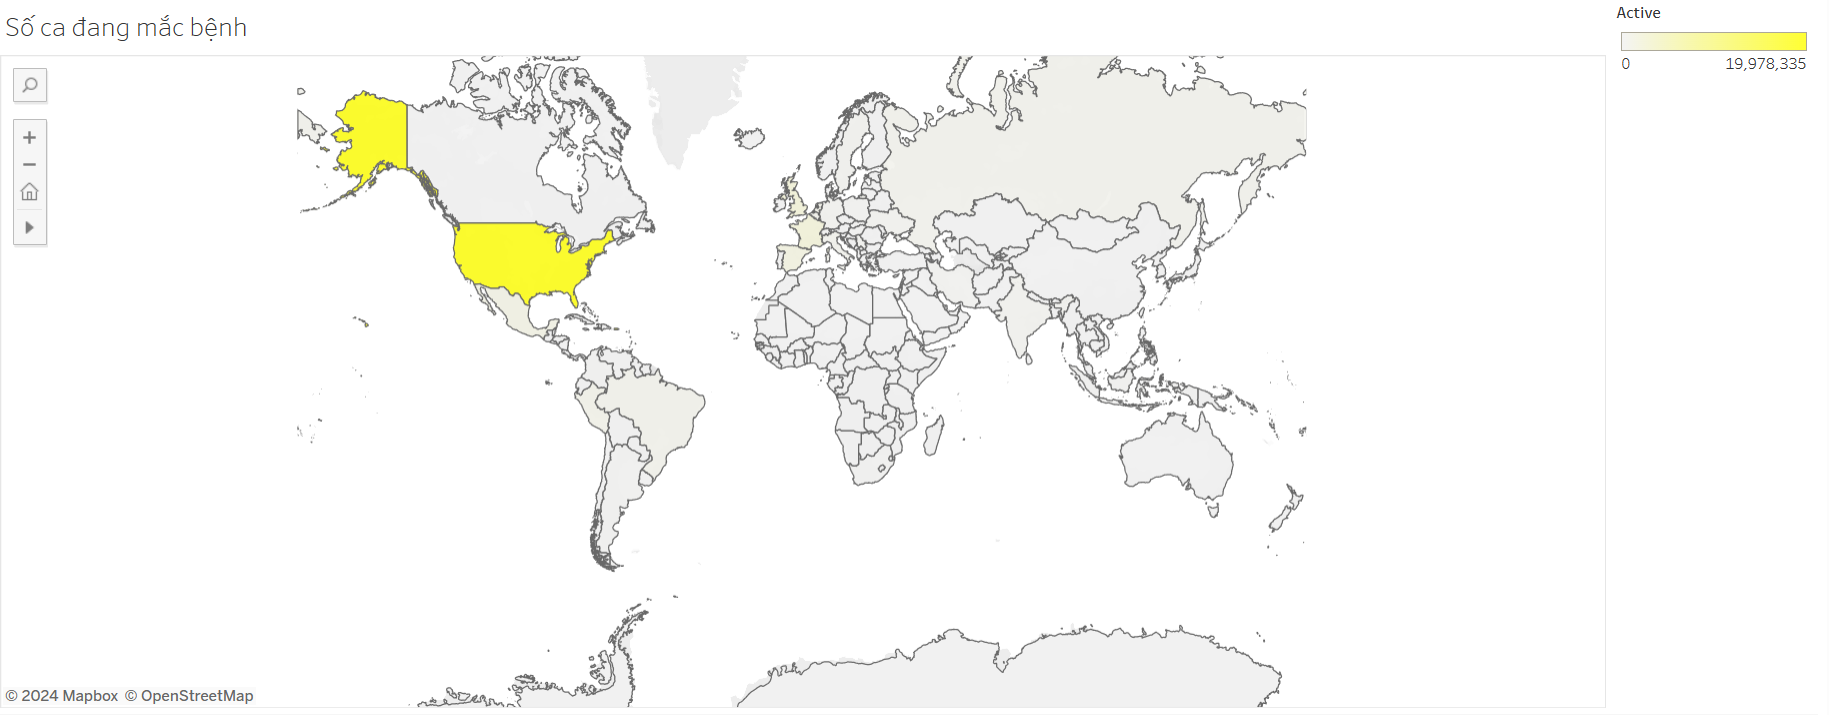

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet3?:language=en-US&:display_count=n&:origin=viz_share_link

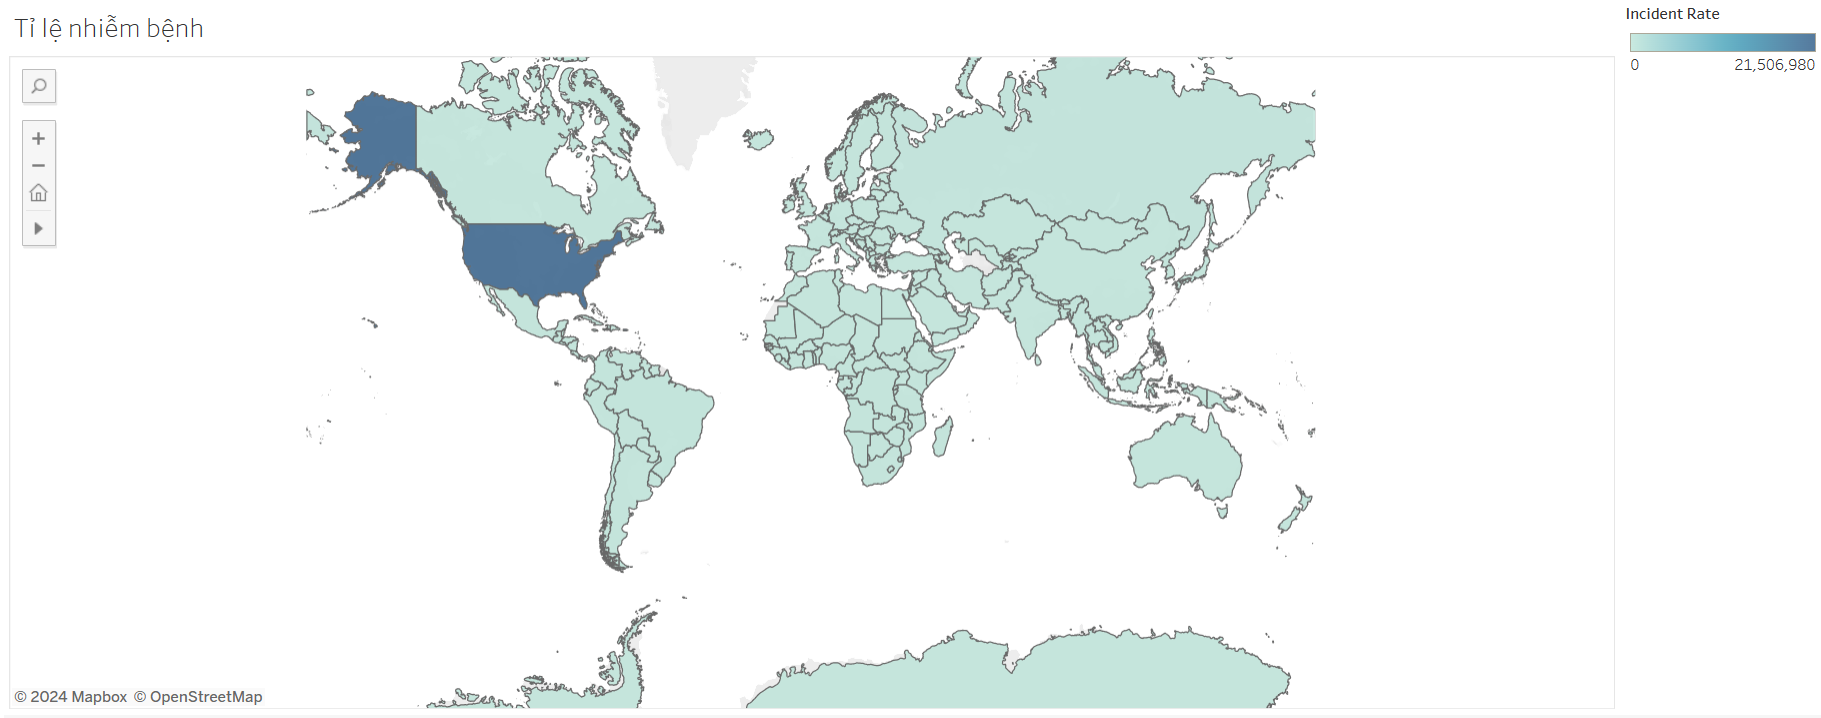

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet4?:language=en-US&:display_count=n&:origin=viz_share_link

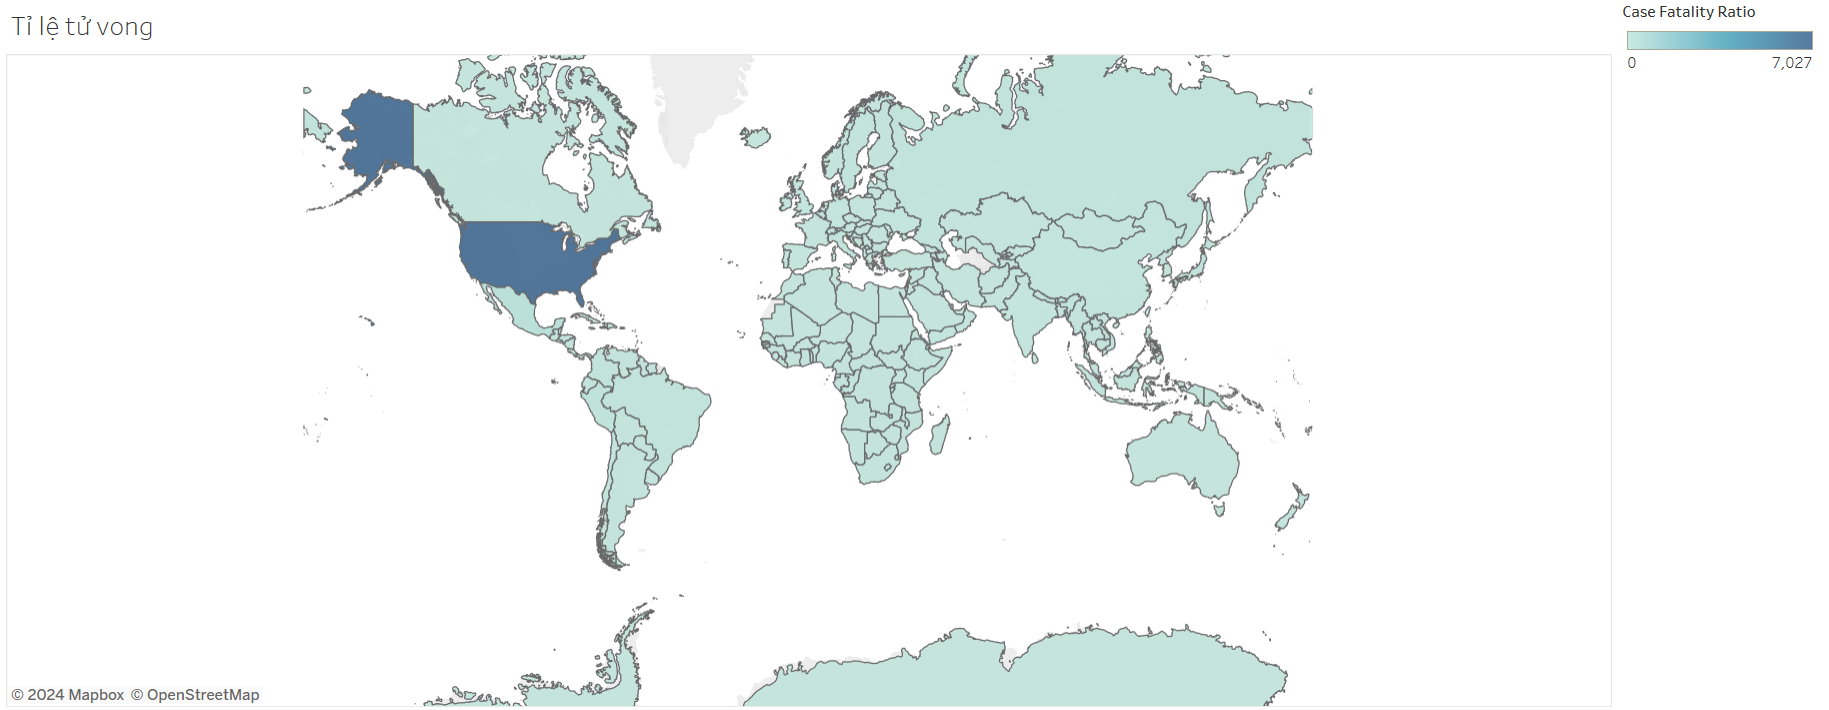

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet5?:language=en-US&:display_count=n&:origin=viz_share_link

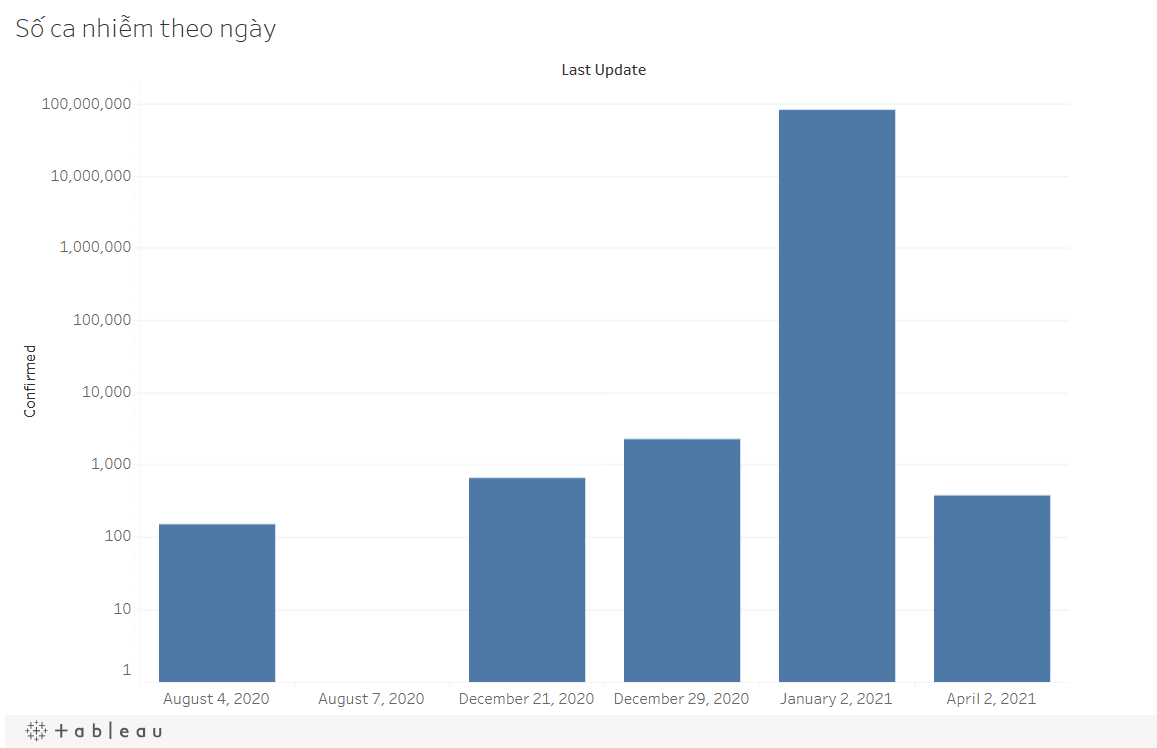

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet6?:language=en-US&:display_count=n&:origin=viz_share_link

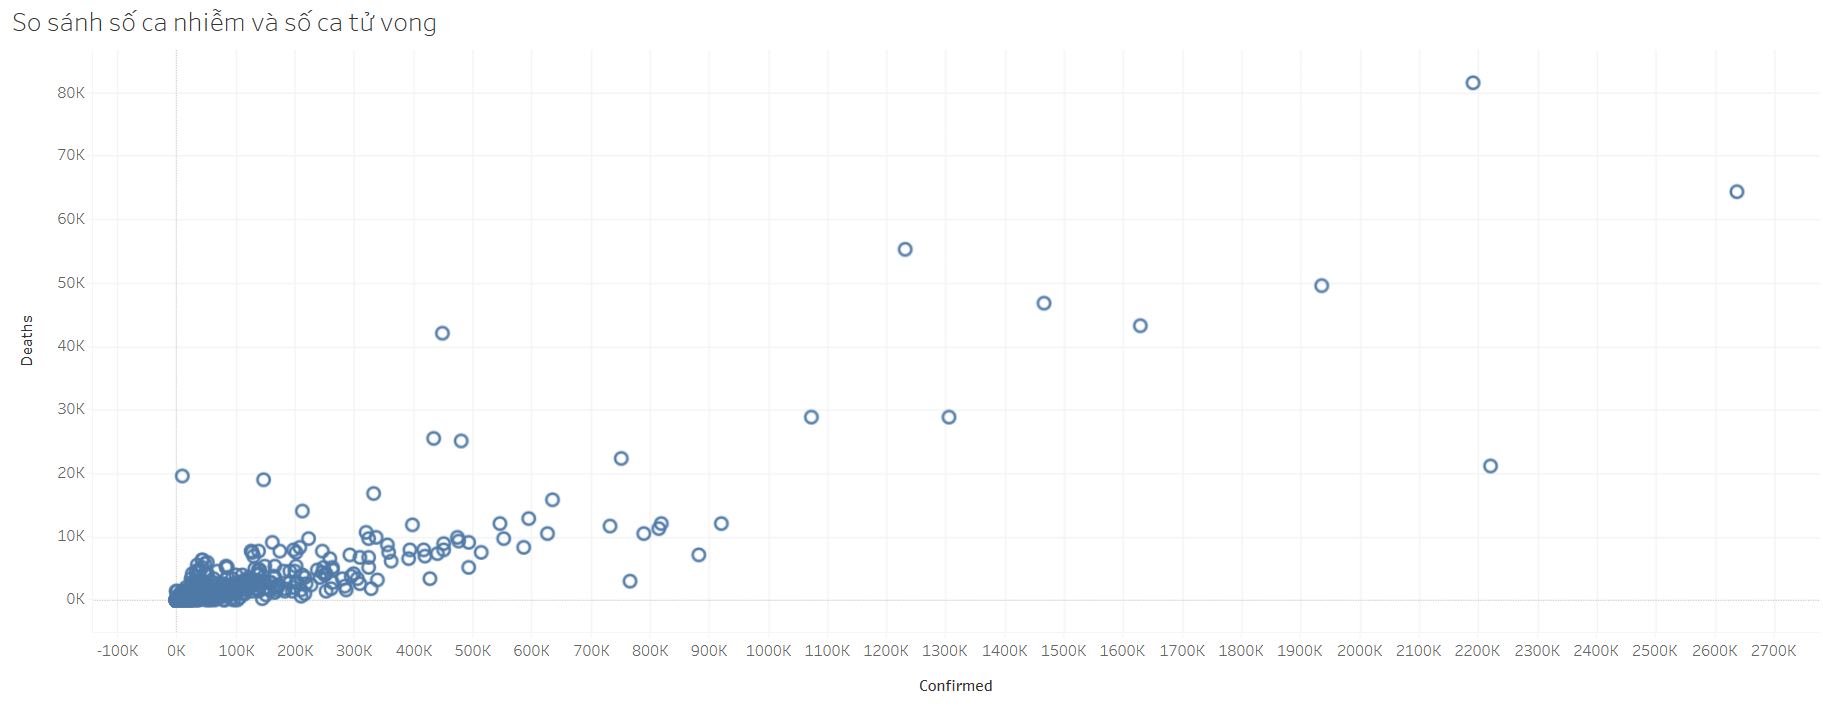

https://public.tableau.com/views/Data_Covid_17040355393520/Sheet7?:language=en-US&:display_count=n&:origin=viz_share_link

## Đề Xuất Biện Pháp và Kết Luận

In [9]:
a = df.groupby("Country_Region")["Confirmed"].sum()

In [10]:
print("Quốc gia có số ca nhiễm cao nhất là ", a.idxmax() , " với số ca nhiễm là", a.max())
print("Quốc gia có số ca nhiễm thấp nhất là ", a.idxmin() , " với số ca nhiễm là", a.min())

Quốc gia có số ca nhiễm cao nhất là  US  với số ca nhiễm là 20397401
Quốc gia có số ca nhiễm thấp nhất là  Antarctica  với số ca nhiễm là 0


In [11]:
a = df.groupby("Last_Update")["Confirmed"].sum()

In [12]:
print("Ngày có số ca nhiễm cao nhất là ", a.idxmax() , " với số ca nhiễm là", a.max())
print("Ngày có số ca nhiễm thấp nhất là ", a.idxmin() , " với số ca nhiễm là", a.min())

Ngày có số ca nhiễm cao nhất là  2021-01-02 05:22:33  với số ca nhiễm là 84332324
Ngày có số ca nhiễm thấp nhất là  2020-08-07 22:34:20  với số ca nhiễm là 0


In [13]:
df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,134.896578,4.191343
1,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,2026.409062,2.025173
2,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,227.809861,2.764848
3,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,10505.403482,1.034865
4,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,53.452981,2.305328


### Các biện pháp
##### 1. Tăng Cường Biện Pháp Phòng Ngừa và Giáo Dục Cộng Đồng:
Tăng cường chiến dịch giáo dục cộng đồng về ý thức phòng ngừa, giữ khoảng cách xã hội, đeo khẩu trang, và rửa tay đều đặn.
Kích thích người dân thực hiện các biện pháp phòng ngừa và giữ vệ sinh cá nhân.
##### 2. Tăng Cường Năng Lực Kiểm Soát Dịch:
Tăng cường khả năng kiểm soát và theo dõi sự lây lan của virus thông qua việc mở rộng khả năng xét nghiệm và theo dõi tiếp xúc.
Đảm bảo sự hợp tác giữa các cấp chính phủ, tổ chức y tế, và cộng đồng để triển khai hiệu quả các biện pháp kiểm soát.
##### 3. Tăng Cường Hệ Thống Y Tế:
Tăng cường khả năng chăm sóc y tế bằng cách tăng cường số lượng giường bệnh và trang thiết bị y tế cần thiết.
Đảm bảo sự chuẩn bị cho việc xử lý các tình huống khẩn cấp và giảm áp lực lên hệ thống y tế.
##### 4. Hỗ Trợ Tài Chính và Xã Hội:
Cung cấp hỗ trợ tài chính cho những người bị ảnh hưởng, đặc biệt là những người mất việc làm do dịch bệnh.
Xem xét các chính sách hỗ trợ xã hội để giúp những gia đình và cộng đồng gặp khó khăn.
##### 5. Quản Lý Nghiêm Ngặt Các Khu Vực Nóng:
Tăng cường quản lý và giám sát chặt chẽ trong các khu vực có số ca nhiễm cao.
Cân nhắc áp dụng các biện pháp hạn chế di chuyển và tụ tập trong các khu vực có nguy cơ lây lan cao.
##### 6. Hỗ Trợ Nghiên Cứu và Phát Triển Vắc Xin:
Hỗ trợ và đầu tư vào nghiên cứu và phát triển vắc xin để có giải pháp bền vững và hiệu quả.
Hợp tác quốc tế để chia sẻ thông tin và kinh nghiệm, cũng như để đảm bảo tiếp cận công bằng đối với vắc xin.